In [2]:
import pandas as pd
import numpy as np

In [5]:
path = '../data/'

#book_counts = pd.read_csv(path + 'books.csv',index_col=0)
#user_counts = pd.read_csv(path + 'user_review_count.csv',index_col=0)
train_df = pd.read_csv(path + 'ksy_train.csv')
valid_df = pd.read_csv(path + 'ksy_valid.csv') 

In [11]:
n = 5
tem = train_df['user_id'].value_counts()
user_counts = list(tem[tem >= n].index)

tem = train_df['isbn'].value_counts()
book_counts = list(tem[tem >= n].index)

In [56]:
def cold_users(n: int=1)->set():
    tem = train_df['user_id'].value_counts()
    cold_users = list(tem[tem <= n].index)
    return cold_users

def cold_books(n:int=0)->set():
    tem = train_df['isbn'].value_counts()
    cold_books = list(tem[tem <= n].index)
    return cold_books

def df_rmse(df:pd.DataFrame):
    df.cat_pred2 = (df.cat_pred - _mean) * 1.05 + _mean
    return ((df.cat_pred2 - df.y)**2).mean()**.5 , len(df)

# def df_rmse(df:pd.DataFrame):
#     return ((6.8 - df.y)**2).mean()**.5 , len(df)

def conditional_rmse(df:pd.DataFrame, userset:set={}, bookset:set={}):
    is_colduser = df['user_id'].isin(userset)
    is_coldbook = df['isbn'].isin(bookset)
    
    print("-*"*10+"두가지로 나눈 경우"+"-*"*10)
    print("----------유저 기준으로 나눴을 때----------")
    error,length = df_rmse(df[is_colduser])
    print(f'RMSE = {error}, {length}개 - 유저 COLD')
    error,length = df_rmse(df[~is_colduser])
    print(f'RMSE = {error}, {length}개 - 유저 데이터가 {n+1}개 이상인 경우')
    print()

    print("----------책 기준으로 나눴을 때----------")
    error,length = df_rmse(df[is_coldbook])
    print(f'RMSE = {error}, {length}개 - 책 COLD')
    error,length = df_rmse(df[~is_coldbook])
    print(f'RMSE = {error}, {length}개 - 책 데이터가 {n+1}개 이상인 경우')
    print()

    print("----------유저,책 둘 기준으로 나눴을 때----------")
    error,length = df_rmse(df[is_colduser&is_coldbook])
    print(f'RMSE = {error}, {length}개 - 유저 COLD, 책 COLD')
    error,length = df_rmse(df[~(is_colduser&is_coldbook)])
    print(f'RMSE = {error}, {length}개 - 유저와 책 둘 다 데이터가 {n+1}개 이상인 경우')
    print('\n')
    
    print("-*"*10+"네가지로 나눈 경우"+"-*"*10)
    error,length = df_rmse(df[is_colduser&is_coldbook])
    print(f'RMSE = {error}, {length}개 - 유저 COLD, 책 COLD')
    print()
    error,length = df_rmse(df[is_colduser&~is_coldbook])
    print(f'RMSE = {error}, {length}개 - 유저 COLD, 책 HOT')
    print()
    error,length = df_rmse(df[~is_colduser&is_coldbook])
    print(f'RMSE = {error}, {length}개 - 유저 HOT, 책 COLD')
    print()
    error,length = df_rmse(df[~is_colduser&~is_coldbook])
    print(f'RMSE = {error}, {length}개 - 유저 HOT, 책 HOT')
    print()

    print("-"*20)
    error,length = df_rmse(df)
    print(f'RMSE = {error}, {length}개 - 총 데이터')


In [23]:
valid_df['y'].mean()

7.073029221467103

In [57]:
n = 10
cu_n = cold_users(n)
cb_n = cold_books(n)
_mean = valid_df[valid_df['user_id'].isin(cu_n)]['y'].mean()
print(f"Cold Start {n}개 기준")
conditional_rmse(valid_df,cu_n,cb_n)

Cold Start 10개 기준
-*-*-*-*-*-*-*-*-*-*두가지로 나눈 경우-*-*-*-*-*-*-*-*-*-*
----------유저 기준으로 나눴을 때----------
RMSE = 2.2991505427609877, 17814개 - 유저 COLD
RMSE = 2.072884362178345, 43545개 - 유저 데이터가 11개 이상인 경우

----------책 기준으로 나눴을 때----------
RMSE = 2.122205025506493, 25905개 - 책 COLD
RMSE = 2.1546974094790268, 35454개 - 책 데이터가 11개 이상인 경우

----------유저,책 둘 기준으로 나눴을 때----------
RMSE = 2.2851618672595766, 7507개 - 유저 COLD, 책 COLD
RMSE = 2.1201710649327974, 53852개 - 유저와 책 둘 다 데이터가 11개 이상인 경우


-*-*-*-*-*-*-*-*-*-*네가지로 나눈 경우-*-*-*-*-*-*-*-*-*-*
RMSE = 2.2851618672595766, 7507개 - 유저 COLD, 책 COLD

RMSE = 2.309285720200963, 10307개 - 유저 COLD, 책 HOT

RMSE = 2.0519990747557664, 18398개 - 유저 HOT, 책 COLD

RMSE = 2.088032092817024, 25147개 - 유저 HOT, 책 HOT

--------------------
RMSE = 2.141039678621469, 61359개 - 총 데이터


/tmp/ipykernel_125579/3212743179.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cat_pred2 = (df.cat_pred - _mean) * 1.05 + _mean


<AxesSubplot:>

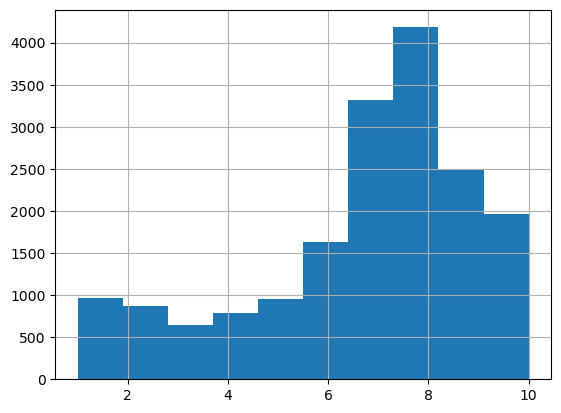

In [49]:
valid_df[valid_df['user_id'].isin(cu_n)]['y'].hist()

<AxesSubplot:>

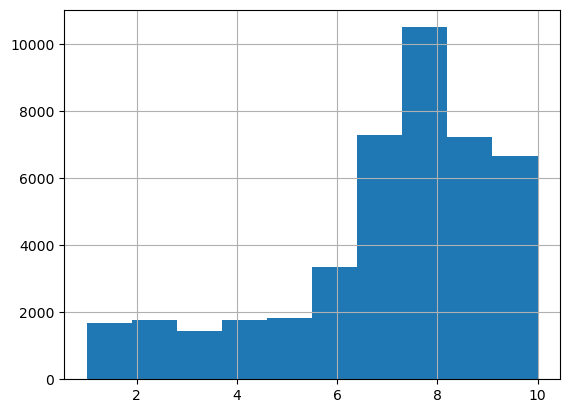

In [51]:
valid_df[~valid_df['user_id'].isin(cu_n)]['y'].hist()